In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [35]:
img = cv2.imread('NAMA.jpg')

In [37]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [39]:
(baris, kolom) = img_rgb.shape[:2]

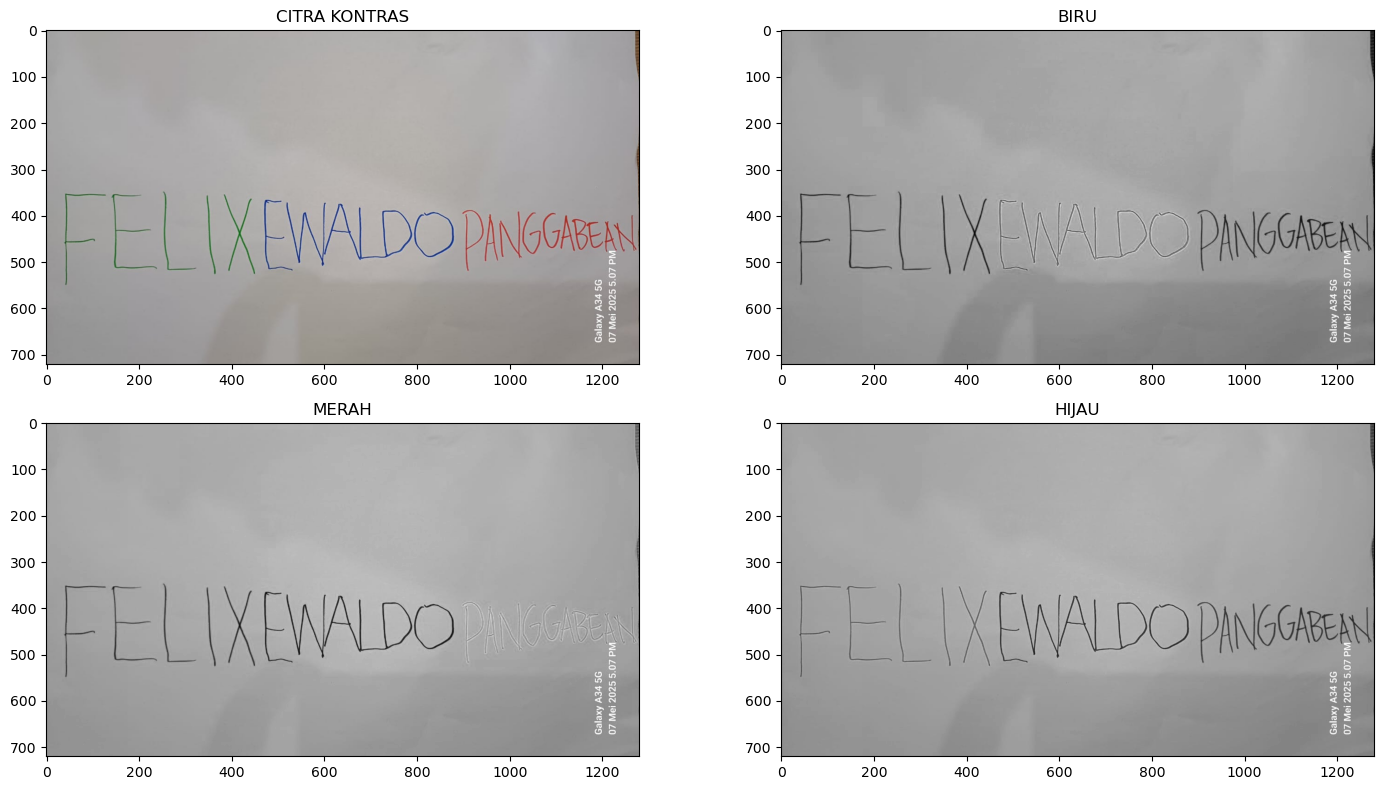

In [41]:
# Memisahkan channel BGR
B, G, R = cv2.split(image)

# Konversi BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

faktor = 0.1 # Semakin kecil nilainya, semakin pudar
G_pudar = (G * faktor).astype(np.uint8)

# Membuat subplot untuk menampilkan gambar
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

# Citra RGB
axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title("CITRA KONTRAS")
axs[0, 0].axis('on')       # Menampilkan axis ticks
axs[0, 0].grid(False)      # Nonaktifkan grid

# Channel Biru
axs[0, 1].imshow(B, cmap='gray')
axs[0, 1].set_title("BIRU")
axs[0, 1].axis('on')
axs[0, 1].grid(False)

# Channel Merah
axs[1, 0].imshow(R, cmap='gray')
axs[1, 0].set_title("MERAH")
axs[1, 0].axis('on')
axs[1, 0].grid(False)

# Channel Hijau
axs[1, 1].imshow(G, cmap='gray')
axs[1, 1].set_title("HIJAU")
axs[1, 1].axis('on')
axs[1, 1].grid(False)

plt.tight_layout()
plt.show()

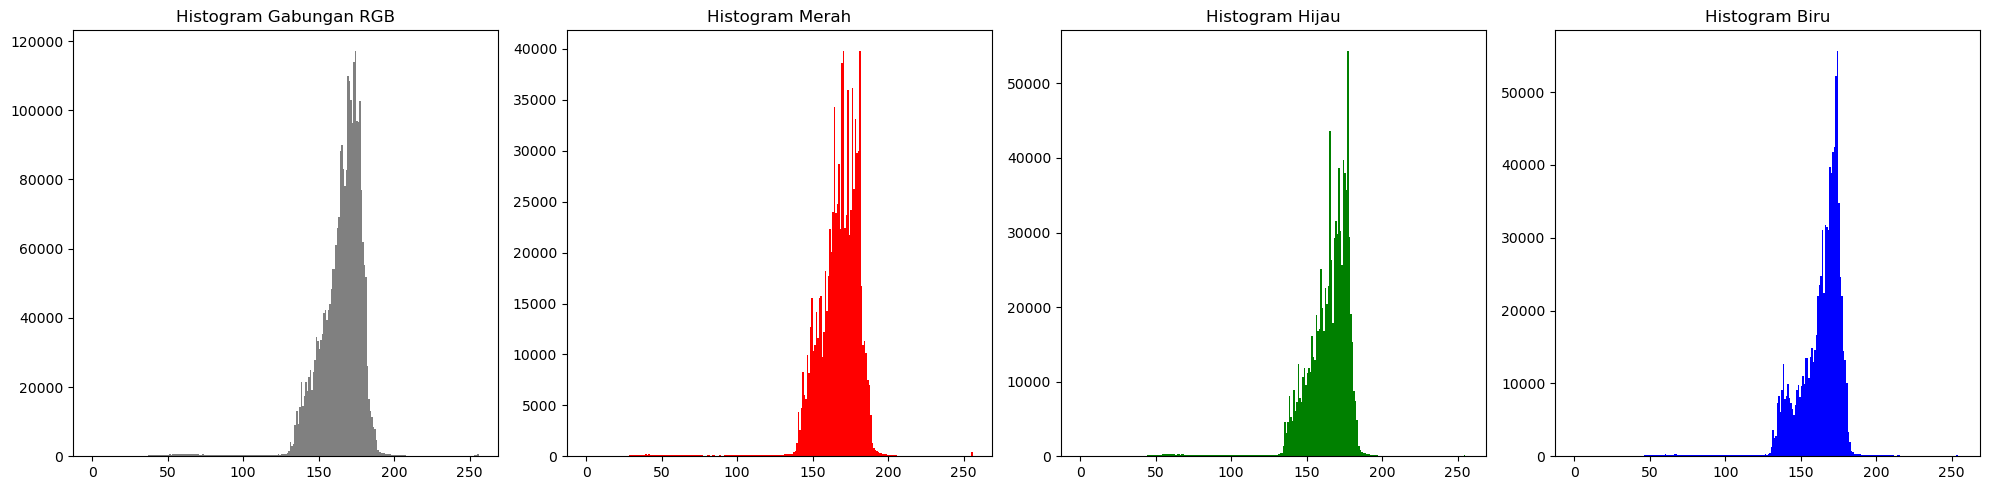

In [43]:
# Ambil channel warna dari gambar RGB asli
r = img_rgb[:, :, 0]
g = img_rgb[:, :, 1]
b = img_rgb[:, :, 2]

# Tampilkan histogram
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title('Histogram Gabungan RGB')
plt.hist(img_rgb.flatten(), bins=256, range=[0,256], color='gray')

plt.subplot(1, 4, 2)
plt.title('Histogram Merah')
plt.hist(r.flatten(), bins=256, range=[0,256], color='r')

plt.subplot(1, 4, 3)
plt.title('Histogram Hijau')
plt.hist(g.flatten(), bins=256, range=[0,256], color='g')

plt.subplot(1, 4, 4)
plt.title('Histogram Biru')
plt.hist(b.flatten(), bins=256, range=[0,256], color='b')

plt.tight_layout()
plt.show()

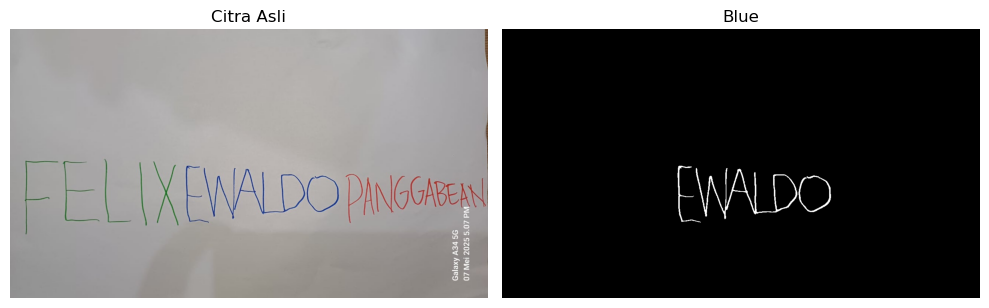

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan konversi ke HSV
img_bgr = cv2.imread('NAMA.jpg')
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Definisikan rentang warna biru dalam HSV
blue_range = {
    'lower': np.array([100, 50, 50]),
    'upper': np.array([130, 255, 255])
}

# Buat masker untuk area biru
blue_mask = cv2.inRange(img_hsv, blue_range['lower'], blue_range['upper'])

# Terapkan masking pada gambar asli
blue_segment = cv2.bitwise_and(img_bgr, img_bgr, mask=blue_mask)

# Tampilkan hasil menggunakan subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Gambar asli dalam RGB
ax1.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
ax1.set_title('Citra Asli')
ax1.axis('off')

# Masker biru sebagai citra grayscale
ax2.imshow(blue_mask, cmap='gray')
ax2.set_title('Blue')
ax2.axis('off')

plt.tight_layout()
plt.show()

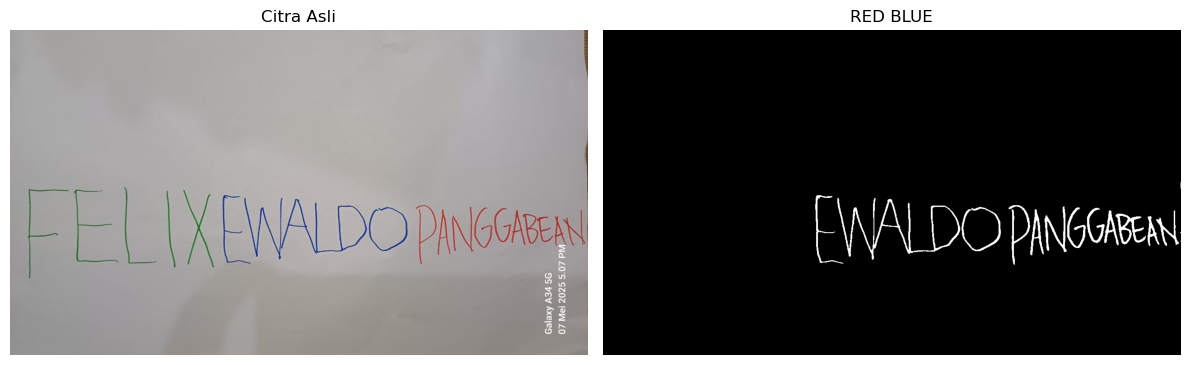

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan ubah ke HSV
image = cv2.imread('NAMA.jpg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Fungsi pembuat masker dari rentang warna
def buat_masker(hsv, batas_bawah, batas_atas):
    return cv2.inRange(hsv, batas_bawah, batas_atas)

# Daftar rentang warna
warna_biru = ([100, 50, 50], [130, 255, 255])
merah_1 = ([0, 50, 50], [10, 255, 255])
merah_2 = ([170, 50, 50], [180, 255, 255])

# Buat masker masing-masing warna
mask_biru = buat_masker(hsv_image, np.array(warna_biru[0]), np.array(warna_biru[1]))
mask_merah1 = buat_masker(hsv_image, np.array(merah_1[0]), np.array(merah_1[1]))
mask_merah2 = buat_masker(hsv_image, np.array(merah_2[0]), np.array(merah_2[1]))

# Gabungkan kedua masker merah
mask_merah = cv2.bitwise_or(mask_merah1, mask_merah2)

# Gabungkan merah dan biru
mask_final = cv2.bitwise_or(mask_biru, mask_merah)

# Tampilkan hasil
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Citra Asli')
axes[0].axis('off')

axes[1].imshow(mask_final, cmap='gray')
axes[1].set_title('RED BLUE')
axes[1].axis('off')

plt.tight_layout()
plt.show()

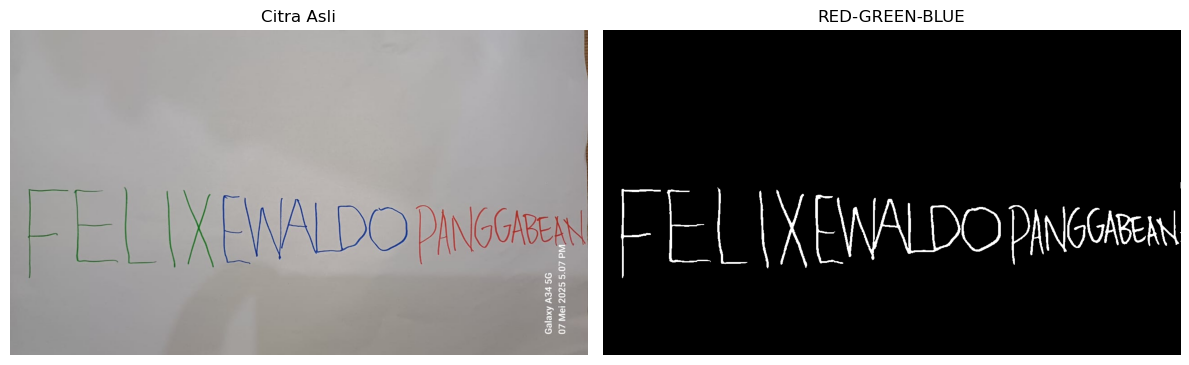

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi bantu untuk membuat masker dari rentang HSV
def buat_mask(hsv_img, batas):
    mask = np.zeros(hsv_img.shape[:2], dtype=np.uint8)
    for lower, upper in batas:
        mask = cv2.bitwise_or(mask, cv2.inRange(hsv_img, np.array(lower), np.array(upper)))
    return mask

# Baca citra dan konversi ke HSV
gambar = cv2.imread('NAMA.jpg')
gambar_hsv = cv2.cvtColor(gambar, cv2.COLOR_BGR2HSV)

# Definisikan rentang HSV untuk masing-masing warna
rentang_biru = [([100, 50, 50], [130, 255, 255])]
rentang_merah = [([0, 50, 50], [10, 255, 255]), ([170, 50, 50], [180, 255, 255])]
rentang_hijau = [([30, 25, 25], [120, 255, 255])]

# Buat masker untuk masing-masing warna
mask_biru = buat_mask(gambar_hsv, rentang_biru)
mask_merah = buat_mask(gambar_hsv, rentang_merah)
mask_hijau = buat_mask(gambar_hsv, rentang_hijau)

# Gabungkan semua masker warna
mask_final = cv2.bitwise_or(cv2.bitwise_or(mask_biru, mask_merah), mask_hijau)

# Terapkan masker ke citra asli
hasil = cv2.bitwise_and(gambar, gambar, mask=mask_final)

# Tampilkan citra asli dan hasil masker
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
axes[0].set_title('Citra Asli')
axes[0].axis('off')

axes[1].imshow(mask_final, cmap='gray')
axes[1].set_title('RED-GREEN-BLUE')
axes[1].axis('off')

plt.tight_layout()
plt.show()

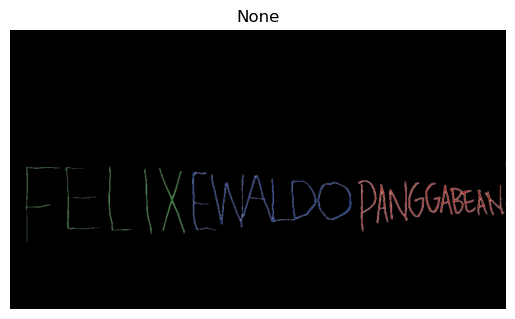

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def tampilkan_citra(citra, judul="Citra"):
    rgb_image = cv2.cvtColor(citra, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.title(judul)
    plt.axis('off')
    plt.show()

# Baca citra dan konversi ke HSV
citra_asli = cv2.imread('NAMA.jpg')
citra_hsv = cv2.cvtColor(citra_asli, cv2.COLOR_BGR2HSV)

# Daftar rentang HSV untuk warna
rentang_hsv = {
    'biru':  ([100, 50, 50], [130, 255, 255]),
    'merah1': ([0, 50, 50], [10, 255, 255]),
    'merah2': ([170, 50, 50], [180, 255, 255]),
    'hijau': ([50, 50, 50], [80, 255, 255])
}

# Buat masker untuk tiap warna
masker_biru = cv2.inRange(citra_hsv, np.array(rentang_hsv['biru'][0]), np.array(rentang_hsv['biru'][1]))
masker_merah1 = cv2.inRange(citra_hsv, np.array(rentang_hsv['merah1'][0]), np.array(rentang_hsv['merah1'][1]))
masker_merah2 = cv2.inRange(citra_hsv, np.array(rentang_hsv['merah2'][0]), np.array(rentang_hsv['merah2'][1]))
masker_hijau = cv2.inRange(citra_hsv, np.array(rentang_hsv['hijau'][0]), np.array(rentang_hsv['hijau'][1]))

# Gabungkan semua masker
masker_total = masker_biru | masker_merah1 | masker_merah2 | masker_hijau

# Buat citra hitam kosong (dalam format BGR)
citra_hitam = np.zeros_like(citra_asli)

# Aplikasikan masking pada citra hitam
hasil = cv2.bitwise_and(citra_asli, citra_asli, mask=masker_total)

# Tampilkan hasil
tampilkan_citra(hasil, "None")

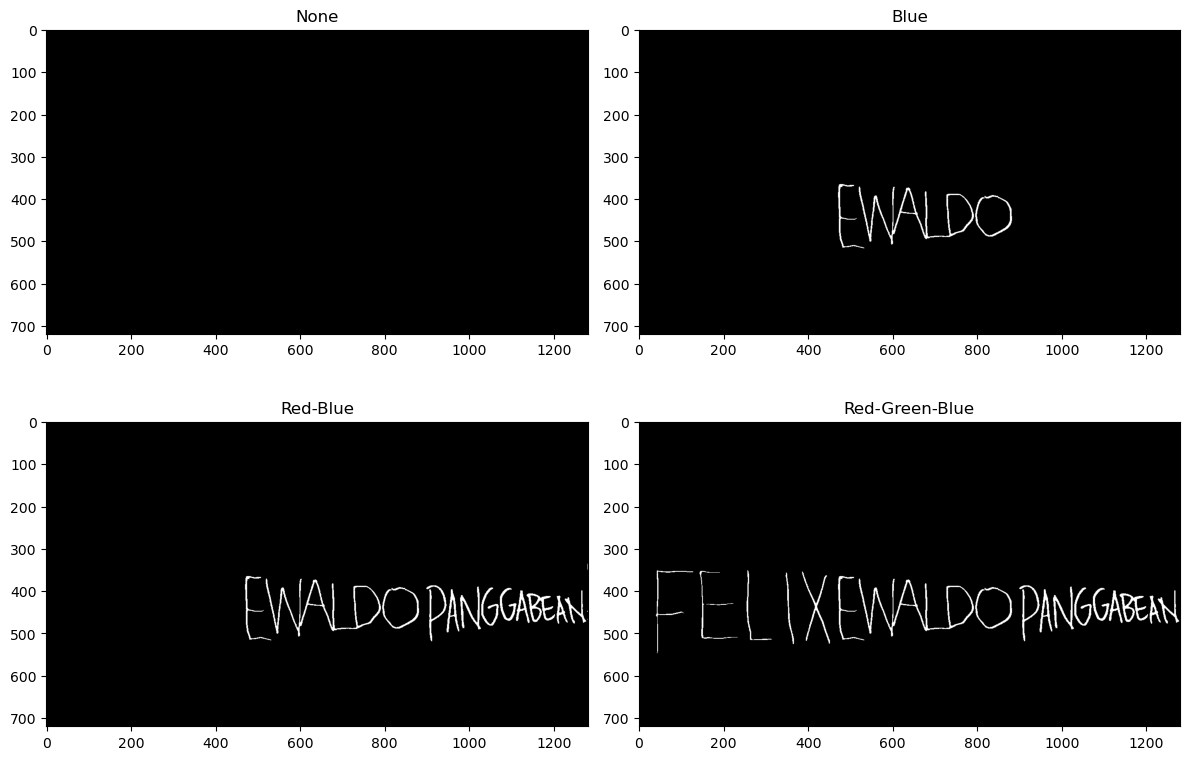

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def tampilkan_subplots(data_gambar, judul_gambar, layout=(2, 2), ukuran=(12, 8)):
    fig, axes = plt.subplots(*layout, figsize=ukuran)
    axes = axes.flatten()

    for idx, (gambar, judul) in enumerate(zip(data_gambar, judul_gambar)):
        if len(gambar.shape) == 2:  # Grayscale
            axes[idx].imshow(gambar, cmap='gray')
        else:  # Warna (BGR ke RGB)
            axes[idx].imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))

        axes[idx].set_title(judul)
        axes[idx].axis('on')

    plt.tight_layout()
    plt.show()

# Buat daftar gambar yang ingin ditampilkan
none_output = cv2.bitwise_and(black_image, black_image, mask=combined_mask)

gambar_list = [none_output, blue_mask, red_blue_mask, combined_mask]
judul_list = ['None', 'Blue', 'Red-Blue', 'Red-Green-Blue']

# Tampilkan semua dalam subplot
tampilkan_subplots(gambar_list, judul_list)

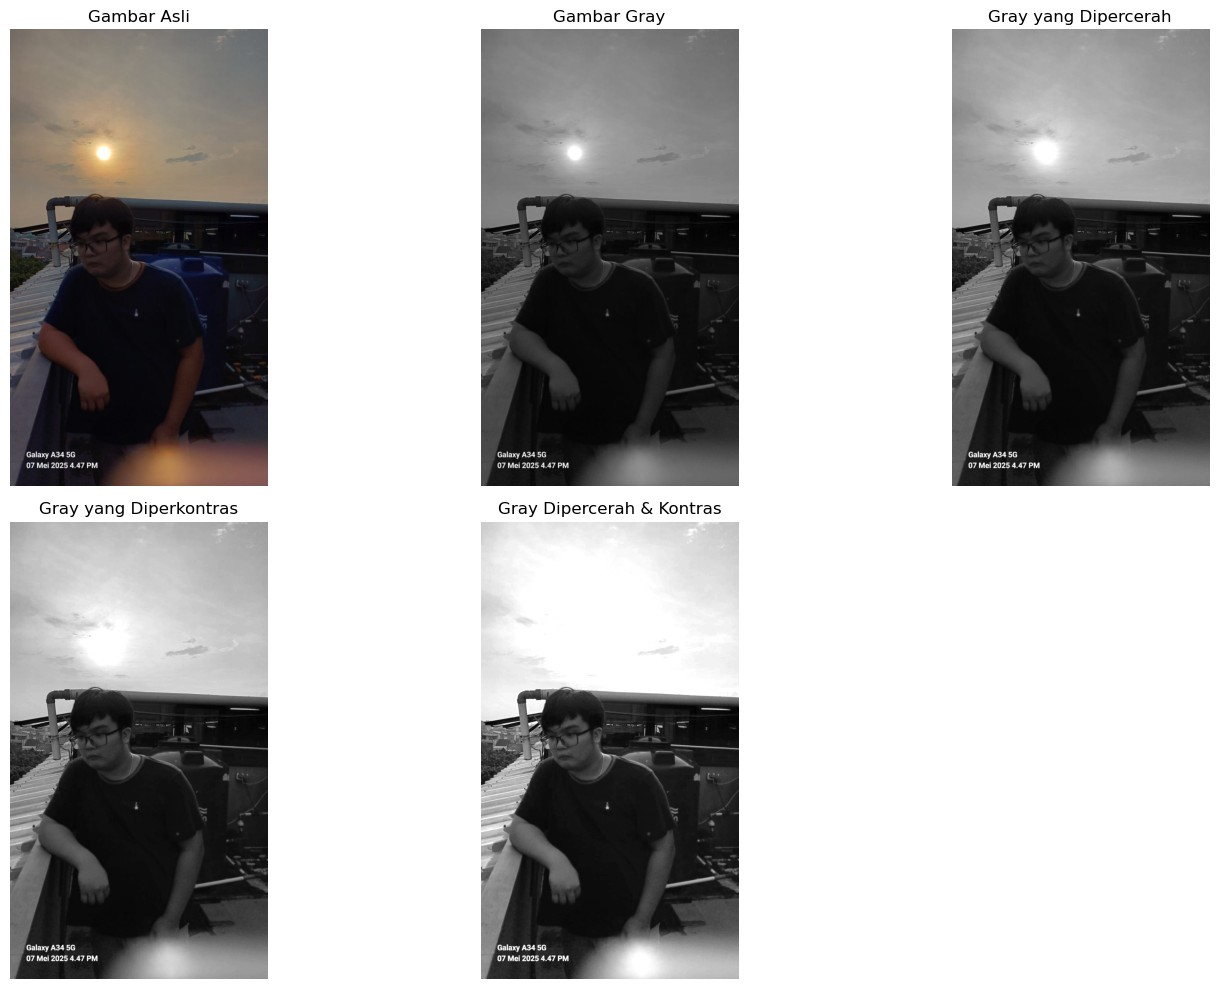

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ubah_kecerahan_kontras(image, alpha=1.0, beta=0):
    """Fungsi untuk mengubah kontras (alpha) dan kecerahan (beta)"""
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def tampilkan_semua(gambar_dict):
    plt.figure(figsize=(15, 10))
    for i, (judul, gambar) in enumerate(gambar_dict.items(), start=1):
        plt.subplot(2, 3, i)
        if len(gambar.shape) == 2:
            plt.imshow(gambar, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
        plt.title(judul)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Baca gambar dan konversi
gambar_asli = cv2.imread("POTRET.jpg")
gambar_gray = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2GRAY)

# Proses
gray_terang = ubah_kecerahan_kontras(gambar_gray, alpha=1.0, beta=50)
gray_kontras = ubah_kecerahan_kontras(gambar_gray, alpha=1.5, beta=0)
gray_terang_kontras = ubah_kecerahan_kontras(gambar_gray, alpha=1.5, beta=50)

# Dictionary untuk ditampilkan
gambar_dict = {
    "Gambar Asli": gambar_asli,
    "Gambar Gray": gambar_gray,
    "Gray yang Dipercerah": gray_terang,
    "Gray yang Diperkontras": gray_kontras,
    "Gray Dipercerah & Kontras": gray_terang_kontras
}

# Tampilkan
tampilkan_semua(gambar_dict)